In [1]:
import numpy as np 
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')  
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd
from plotnine import *
import io

import statistics as st
%matplotlib inline
import matplotlib.dates as mdates
from pandas import DataFrame
from pandas import to_datetime
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from  sklearn.metrics import mean_absolute_error

/home/work/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.0' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('Agri_all.csv')
df

,YMD,YM,MD,Product,Price,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,4.400000,12.800000,35.200000,0.000000,2.600000,1.600000,0.000000
1,2005-01-04,200501,104,마늘,20785.714286,1013.00,3.33,49.58,58.27,65.4,60.5,-0.200000,8.800000,26.000000,0.000000,2.800000,2.800000,0.000000
2,2005-01-05,200501,105,마늘,20928.571429,1013.00,3.33,49.58,58.27,65.4,60.5,-1.400000,11.200000,33.400000,0.000000,0.600000,3.200000,0.000000
3,2005-01-06,200501,106,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.800000,7.800000,31.200000,1.200000,1.200000,2.600000,0.000000
4,2005-01-07,200501,107,마늘,21071.428571,1013.00,3.33,49.58,58.27,65.4,60.5,2.000000,7.600000,28.400000,0.000000,2.800000,2.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15875,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.13,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
15876,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
15877,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.13,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
15878,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.13,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [3]:
df["Product"].unique()

array(['마늘', '깻잎', '감자', '고구마'], dtype=object)

In [4]:
df = df[df['Product'] == '고구마']
df.rename(columns = {'YMD' : 'ds', 'Price' : 'y'}, inplace=True)
df = df.reset_index()
df = df.drop(columns='index')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count
0,2005-01-03,200501,103,고구마,4291.111111,1013.00,3.33,53.12,41.811,65.4,60.5,4.000000,7.000000,0.000000,1.000000,4.000000,0.000000,0.000000
1,2005-01-04,200501,104,고구마,4374.444444,1013.00,3.33,53.12,41.811,65.4,60.5,-3.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000
2,2005-01-05,200501,105,고구마,4603.720930,1013.00,3.33,53.12,41.811,65.4,60.5,-5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2005-01-06,200501,106,고구마,4640.930233,1013.00,3.33,53.12,41.811,65.4,60.5,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4,2005-01-07,200501,107,고구마,4515.454545,1013.00,3.33,53.12,41.811,65.4,60.5,-2.000000,9.000000,0.000000,0.000000,4.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3965,2020-12-24,202012,1224,고구마,10258.695652,1180.05,0.70,137.90,96.130,108.6,116.4,3.529412,8.588235,59.117647,0.000000,1.705882,3.529412,0.000000
3966,2020-12-28,202012,1228,고구마,10431.323529,1180.05,0.70,137.90,96.130,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000
3967,2020-12-29,202012,1229,고구마,10431.323529,1180.05,0.70,137.90,96.130,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727
3968,2020-12-30,202012,1230,고구마,10460.735294,1180.05,0.70,137.90,96.130,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333


In [5]:
start_date = pd.to_datetime('2005-01-01') ## 시작 날짜
end_date = pd.to_datetime('2020-12-31') ## 마지막 날짜
 
dates = pd.date_range(start_date,end_date,freq='D') ## 일단위로 생성
dates = pd.DataFrame(dates)
dates = dates.rename(columns={0 : 'ds'})
dates

,ds
0,2005-01-01
1,2005-01-02
2,2005-01-03
3,2005-01-04
4,2005-01-05
...,...
5839,2020-12-27
5840,2020-12-28
5841,2020-12-29
5842,2020-12-30


In [6]:
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
def _fig_plot(df, X, Y):
  ''' Function plots the data. requires to provide dataframe in the
  format of date as ds, observation as y, Preset other variables e.g., axis name
  '''
  df.plot(x = X, y = Y, figsize=Figsize, label = Label)
  plt.xlabel(xAxisLabel, fontsize = 16) # matplotlib.pyplot
  plt.ylabel(yAxisLabel, fontsize = 16)
  plt.legend()
  plt.title(Title, fontsize = 20)
  ax = plt.gca().get_xaxis()

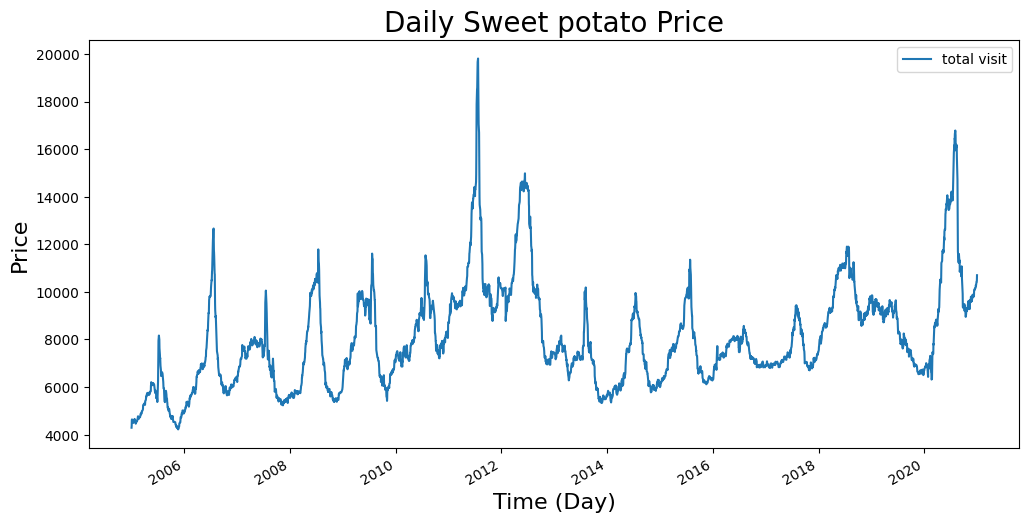

In [8]:
X = 'ds'
Y = 'y'
Label = "total visit"
Figsize = (12,6)
Title = "Daily Sweet potato Price"
xAxisLabel = 'Time (Day)'
yAxisLabel = 'Price'
_fig_plot(df, X, Y)

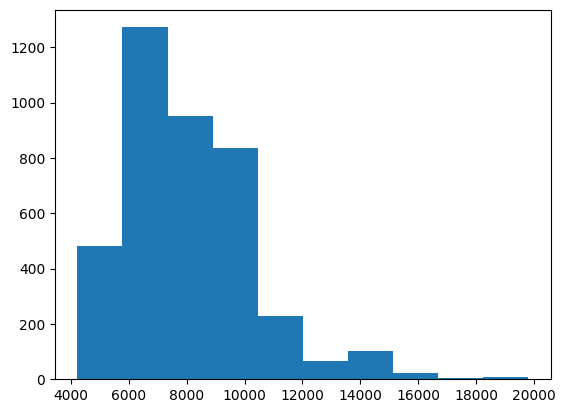

In [9]:
plt.hist(df.y)
plt.show()

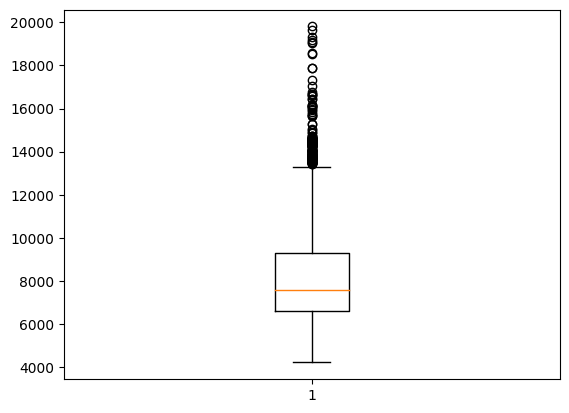

In [10]:
plt.boxplot(df.y)
plt.show()

In [11]:
df_raw = df.copy()
df['y'] = np.log(df['y'])

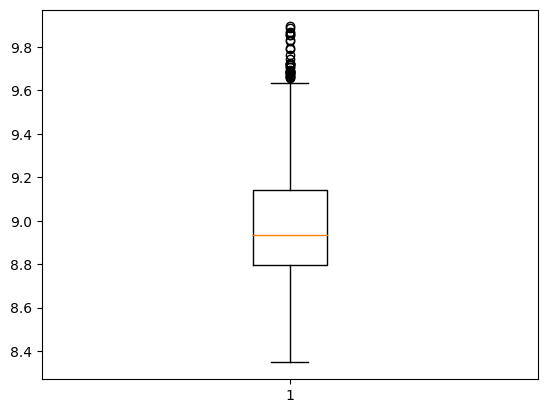

In [12]:
plt.boxplot(df.y.values)
plt.show()

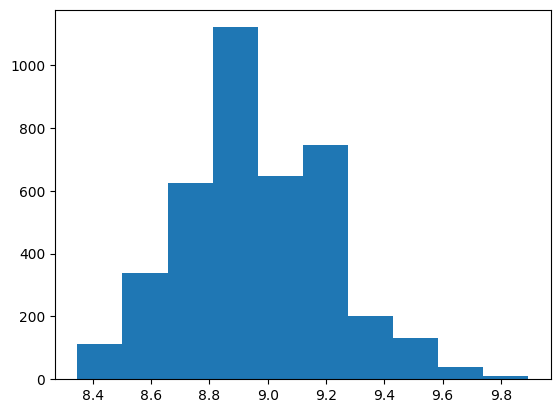

In [13]:
plt.hist(df.y)
plt.show()

In [14]:
Q1=df.y.quantile(0.25)
Q3=df.y.quantile(0.75)
IQR = Q3-Q1
LT=Q1-1.5*IQR
HT= Q3+1.5*IQR
print(LT, HT)
df['outlier']=np.where(((df['y']<LT)|(df['y']>HT)),'yes','no')

8.27863199660938 9.65700116543277


In [15]:
df['outlier'].value_counts()

no     3938
yes      32
Name: outlier, dtype: int64

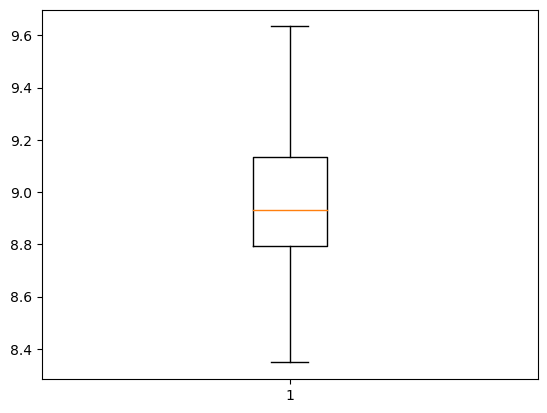

In [16]:
plt.boxplot(df[df.outlier=='no'].y)
plt.show()

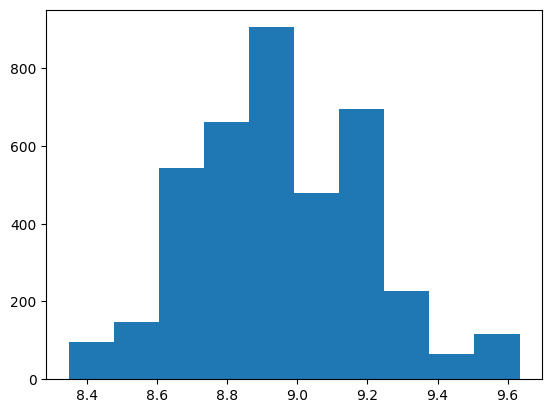

In [17]:
plt.hist(df[df.outlier=='no'].y)
plt.show()

14:34:30 - cmdstanpy - INFO - Chain [1] start processing
14:34:31 - cmdstanpy - INFO - Chain [1] done processing


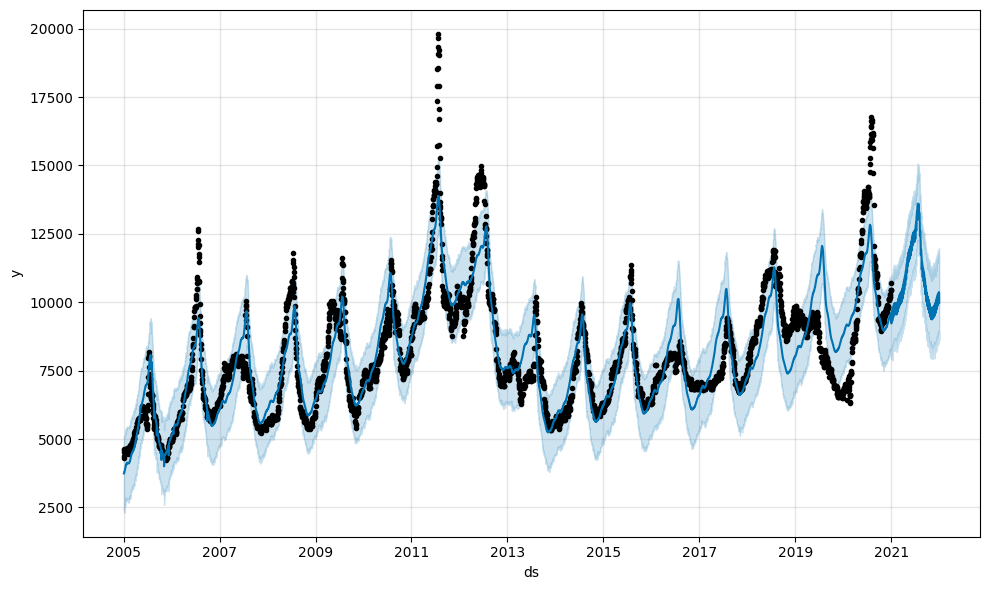

In [18]:
m = Prophet()
m.fit(df_raw)
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

In [19]:
# evaluation_model = cross_validation(m, initial='730 days', period='180 days', horizon = '30 days')
# evaluation_metrix = performance_metrics(evaluation_model)
# evaluation_metrix.head(5)

In [20]:
from sklearn.model_selection import ParameterGrid
params_grid = {
              'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
              'n_changepoints' : [100,150,200]
               }
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)

Total Possible Models 150


In [21]:
df[df['ds'] == '2019-12-31']

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
3721,2019-12-31,201912,1231,고구마,8.806789,1157.8,1.59,82.97,72.648,101.0,97.4,-3.5,6.444444,53.222222,0.0,2.944444,4.5,0.777778,no


In [22]:
train = df.iloc[:3722]      
test = df.iloc[3722:]

In [23]:
print('Training data, last date: ' + str(train.tail(1)['ds']) + ' ' + 'testing data, last date: ' + str(test.tail(1)['ds']))

Training data, last date: 3721   2019-12-31
Name: ds, dtype: datetime64[ns] testing data, last date: 3969   2020-12-31
Name: ds, dtype: datetime64[ns]


In [24]:
# 휴일 생성
import holidays

# 필요한 날짜만큼 생성
date_list = pd.date_range('2010-01-01', '2020-12-31')

# 한국 휴일 객체 생성
kr_holidays = holidays.KR()

# generate holiday table
holiday = pd.DataFrame(columns=['ds','holiday'])
holiday['ds'] = sorted(date_list)
holiday['holiday'] = holiday.ds.apply(lambda x: kr_holidays.get(x) if x in kr_holidays else 'non-holiday')
holiday.head()

,ds,holiday
0,2010-01-01,New Year's Day
1,2010-01-02,non-holiday
2,2010-01-03,non-holiday
3,2010-01-04,non-holiday
4,2010-01-05,non-holiday


# 그리드서치

In [24]:
# model_parameters = pd.DataFrame(columns = ['MAE','Parameters'])
# for p in grid:
#     LOL = pd.DataFrame()
#     print(p)
# #    random.seed(0)
#     train_model =Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
#                          holidays_prior_scale = p['holidays_prior_scale'],
#                          n_changepoints = p['n_changepoints'],
#                          seasonality_mode = p['seasonality_mode'],
                         
#                          daily_seasonality = True,
#                          yearly_seasonality = True,
#                          holidays=holiday, 
#                          interval_width=0.95)
    
#     train_model.fit(train)
#     future = train_model.make_future_dataframe(periods=366, freq='D',include_history = False)
#     train_forecast = train_model.predict(future)
#     LOL=train_forecast[['ds','yhat']]
#     y_true= test['y'].values
#     y_pred = LOL['yhat'][:len(y_true)].values
#     mae = mean_absolute_error(y_true, y_pred)
#     print('Mean Absolute Error: %.3f' % mae)
#     model_parameters = model_parameters.append({'MAE':mae,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:45:06 - cmdstanpy - INFO - Chain [1] start processing
08:45:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2258.594
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:45:21 - cmdstanpy - INFO - Chain [1] start processing
08:45:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2072.115
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:45:37 - cmdstanpy - INFO - Chain [1] start processing
08:45:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2255.466
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:45:59 - cmdstanpy - INFO - Chain [1] start processing
08:46:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.449
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:46:19 - cmdstanpy - INFO - Chain [1] start processing
08:46:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2256.593
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:46:56 - cmdstanpy - INFO - Chain [1] start processing
08:47:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.616
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:47:24 - cmdstanpy - INFO - Chain [1] start processing
08:47:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.150
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:47:46 - cmdstanpy - INFO - Chain [1] start processing
08:47:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.717
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:48:00 - cmdstanpy - INFO - Chain [1] start processing
08:48:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2230.221
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:48:30 - cmdstanpy - INFO - Chain [1] start processing
08:48:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.158
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:48:49 - cmdstanpy - INFO - Chain [1] start processing
08:49:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2248.975
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:49:27 - cmdstanpy - INFO - Chain [1] start processing
08:49:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.707
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:49:50 - cmdstanpy - INFO - Chain [1] start processing
08:50:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2251.483
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:50:13 - cmdstanpy - INFO - Chain [1] start processing
08:50:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.745
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:50:24 - cmdstanpy - INFO - Chain [1] start processing
08:50:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.782
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:50:54 - cmdstanpy - INFO - Chain [1] start processing
08:51:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.520
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:51:15 - cmdstanpy - INFO - Chain [1] start processing
08:51:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.534
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:51:53 - cmdstanpy - INFO - Chain [1] start processing
08:52:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.793
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:52:17 - cmdstanpy - INFO - Chain [1] start processing
08:52:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2243.460
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:52:40 - cmdstanpy - INFO - Chain [1] start processing
08:52:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2072.473
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:52:53 - cmdstanpy - INFO - Chain [1] start processing
08:53:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.743
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:53:22 - cmdstanpy - INFO - Chain [1] start processing
08:53:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2070.860
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:53:42 - cmdstanpy - INFO - Chain [1] start processing
08:54:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2233.962
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:54:20 - cmdstanpy - INFO - Chain [1] start processing
08:54:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2072.313
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:54:39 - cmdstanpy - INFO - Chain [1] start processing
08:55:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2257.234
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:55:02 - cmdstanpy - INFO - Chain [1] start processing
08:55:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.770
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:55:15 - cmdstanpy - INFO - Chain [1] start processing
08:55:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.894
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:55:45 - cmdstanpy - INFO - Chain [1] start processing
08:56:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2070.952
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:56:04 - cmdstanpy - INFO - Chain [1] start processing
08:56:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2235.249
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:56:42 - cmdstanpy - INFO - Chain [1] start processing
08:57:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2071.498
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


08:57:10 - cmdstanpy - INFO - Chain [1] start processing
08:57:30 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2268.594
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


08:57:33 - cmdstanpy - INFO - Chain [1] start processing
08:57:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2107.475
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


08:57:55 - cmdstanpy - INFO - Chain [1] start processing
08:58:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2244.186
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


08:58:25 - cmdstanpy - INFO - Chain [1] start processing
08:58:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2107.559
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


08:58:53 - cmdstanpy - INFO - Chain [1] start processing
08:59:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2251.451
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


08:59:31 - cmdstanpy - INFO - Chain [1] start processing
09:00:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2110.050
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:00:06 - cmdstanpy - INFO - Chain [1] start processing
09:00:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2244.374
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:00:29 - cmdstanpy - INFO - Chain [1] start processing
09:00:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2108.147
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:00:51 - cmdstanpy - INFO - Chain [1] start processing
09:01:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.540
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:01:20 - cmdstanpy - INFO - Chain [1] start processing
09:01:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2106.706
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:01:48 - cmdstanpy - INFO - Chain [1] start processing
09:02:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2244.811
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:02:25 - cmdstanpy - INFO - Chain [1] start processing
09:02:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2113.041
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:03:01 - cmdstanpy - INFO - Chain [1] start processing
09:03:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2241.739
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:03:24 - cmdstanpy - INFO - Chain [1] start processing
09:03:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2106.080
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:03:46 - cmdstanpy - INFO - Chain [1] start processing
09:04:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2232.963
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:04:15 - cmdstanpy - INFO - Chain [1] start processing
09:04:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2110.967
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:04:43 - cmdstanpy - INFO - Chain [1] start processing
09:05:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2230.333
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:05:21 - cmdstanpy - INFO - Chain [1] start processing
09:05:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2110.399
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:05:57 - cmdstanpy - INFO - Chain [1] start processing
09:06:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.688
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:06:19 - cmdstanpy - INFO - Chain [1] start processing
09:06:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2113.935
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:06:41 - cmdstanpy - INFO - Chain [1] start processing
09:07:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.596
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:07:11 - cmdstanpy - INFO - Chain [1] start processing
09:07:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2110.535
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:07:39 - cmdstanpy - INFO - Chain [1] start processing
09:08:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2219.476
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:08:17 - cmdstanpy - INFO - Chain [1] start processing
09:08:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2109.156
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:08:52 - cmdstanpy - INFO - Chain [1] start processing
09:09:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.445
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:09:14 - cmdstanpy - INFO - Chain [1] start processing
09:09:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2108.259
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:09:35 - cmdstanpy - INFO - Chain [1] start processing
09:10:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2230.806
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:10:05 - cmdstanpy - INFO - Chain [1] start processing
09:10:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2111.036
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:10:33 - cmdstanpy - INFO - Chain [1] start processing
09:11:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.869
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:11:11 - cmdstanpy - INFO - Chain [1] start processing
09:11:45 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2113.892
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:11:48 - cmdstanpy - INFO - Chain [1] start processing
09:12:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2249.491
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:12:10 - cmdstanpy - INFO - Chain [1] start processing
09:12:29 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2123.476
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:12:32 - cmdstanpy - INFO - Chain [1] start processing
09:12:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.521
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:13:01 - cmdstanpy - INFO - Chain [1] start processing
09:13:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2138.052
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:13:29 - cmdstanpy - INFO - Chain [1] start processing
09:14:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2247.256
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:14:07 - cmdstanpy - INFO - Chain [1] start processing
09:14:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2137.408
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:14:43 - cmdstanpy - INFO - Chain [1] start processing
09:15:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2211.609
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:15:06 - cmdstanpy - INFO - Chain [1] start processing
09:15:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2120.183
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:15:27 - cmdstanpy - INFO - Chain [1] start processing
09:15:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2245.277
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:15:57 - cmdstanpy - INFO - Chain [1] start processing
09:16:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2128.280
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:16:25 - cmdstanpy - INFO - Chain [1] start processing
09:17:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2241.255
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:17:03 - cmdstanpy - INFO - Chain [1] start processing
09:17:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2136.802
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:17:39 - cmdstanpy - INFO - Chain [1] start processing
09:17:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.139
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:18:01 - cmdstanpy - INFO - Chain [1] start processing
09:18:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2129.132
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:18:23 - cmdstanpy - INFO - Chain [1] start processing
09:18:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2232.908
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:18:52 - cmdstanpy - INFO - Chain [1] start processing
09:19:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2134.288
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:19:20 - cmdstanpy - INFO - Chain [1] start processing
09:19:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.809
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:19:54 - cmdstanpy - INFO - Chain [1] start processing
09:20:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2132.268
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:20:30 - cmdstanpy - INFO - Chain [1] start processing
09:20:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2245.481
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:20:53 - cmdstanpy - INFO - Chain [1] start processing
09:21:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2125.063
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:21:14 - cmdstanpy - INFO - Chain [1] start processing
09:21:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2216.742
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:21:44 - cmdstanpy - INFO - Chain [1] start processing
09:22:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2122.591
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:22:12 - cmdstanpy - INFO - Chain [1] start processing
09:22:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.929
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:22:49 - cmdstanpy - INFO - Chain [1] start processing
09:23:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2131.031
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:23:25 - cmdstanpy - INFO - Chain [1] start processing
09:23:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.568
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:23:48 - cmdstanpy - INFO - Chain [1] start processing
09:24:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2130.542
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:24:09 - cmdstanpy - INFO - Chain [1] start processing
09:24:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.412
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:24:39 - cmdstanpy - INFO - Chain [1] start processing
09:25:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2130.144
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:25:07 - cmdstanpy - INFO - Chain [1] start processing
09:25:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.277
{'changepoint_prior_scale': 0.3, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:25:45 - cmdstanpy - INFO - Chain [1] start processing
09:26:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2125.654
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:26:20 - cmdstanpy - INFO - Chain [1] start processing
09:26:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2240.721
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:26:43 - cmdstanpy - INFO - Chain [1] start processing
09:27:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2134.322
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:27:04 - cmdstanpy - INFO - Chain [1] start processing
09:27:32 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2262.627
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:27:34 - cmdstanpy - INFO - Chain [1] start processing
09:27:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2147.517
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:28:02 - cmdstanpy - INFO - Chain [1] start processing
09:28:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.603
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:28:40 - cmdstanpy - INFO - Chain [1] start processing
09:29:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2142.611
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:29:15 - cmdstanpy - INFO - Chain [1] start processing
09:29:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2245.814
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:29:38 - cmdstanpy - INFO - Chain [1] start processing
09:29:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2143.200
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:29:59 - cmdstanpy - INFO - Chain [1] start processing
09:30:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2240.676
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:30:29 - cmdstanpy - INFO - Chain [1] start processing
09:30:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2158.993
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:30:57 - cmdstanpy - INFO - Chain [1] start processing
09:31:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.627
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:31:35 - cmdstanpy - INFO - Chain [1] start processing
09:32:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2138.238
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:32:11 - cmdstanpy - INFO - Chain [1] start processing
09:32:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2222.370
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:32:33 - cmdstanpy - INFO - Chain [1] start processing
09:32:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2147.080
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:32:55 - cmdstanpy - INFO - Chain [1] start processing
09:33:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2229.134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:33:24 - cmdstanpy - INFO - Chain [1] start processing
09:33:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2141.746
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:33:52 - cmdstanpy - INFO - Chain [1] start processing
09:34:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2229.985
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:34:30 - cmdstanpy - INFO - Chain [1] start processing
09:35:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2141.514
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:35:05 - cmdstanpy - INFO - Chain [1] start processing
09:35:26 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2235.732
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:35:28 - cmdstanpy - INFO - Chain [1] start processing
09:35:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2142.064
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:35:49 - cmdstanpy - INFO - Chain [1] start processing
09:36:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2226.625
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:36:19 - cmdstanpy - INFO - Chain [1] start processing
09:36:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2143.769
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:36:47 - cmdstanpy - INFO - Chain [1] start processing
09:37:23 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2233.778
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:37:25 - cmdstanpy - INFO - Chain [1] start processing
09:37:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2159.862
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:38:00 - cmdstanpy - INFO - Chain [1] start processing
09:38:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.663
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:38:23 - cmdstanpy - INFO - Chain [1] start processing
09:38:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2149.134
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:38:44 - cmdstanpy - INFO - Chain [1] start processing
09:39:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2236.535
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:39:14 - cmdstanpy - INFO - Chain [1] start processing
09:39:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2158.326
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:39:42 - cmdstanpy - INFO - Chain [1] start processing
09:40:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2239.797
{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:40:20 - cmdstanpy - INFO - Chain [1] start processing
09:40:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2143.738
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:40:56 - cmdstanpy - INFO - Chain [1] start processing
09:41:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2251.507
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:41:19 - cmdstanpy - INFO - Chain [1] start processing
09:41:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2141.786
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:41:40 - cmdstanpy - INFO - Chain [1] start processing
09:42:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2238.190
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:42:10 - cmdstanpy - INFO - Chain [1] start processing
09:42:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2161.128
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:42:38 - cmdstanpy - INFO - Chain [1] start processing
09:43:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2254.047
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:43:16 - cmdstanpy - INFO - Chain [1] start processing
09:43:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2163.814
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:43:51 - cmdstanpy - INFO - Chain [1] start processing
09:44:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2244.880
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:44:14 - cmdstanpy - INFO - Chain [1] start processing
09:44:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2148.772
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:44:36 - cmdstanpy - INFO - Chain [1] start processing
09:45:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2244.716
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:45:05 - cmdstanpy - INFO - Chain [1] start processing
09:45:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2155.612
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:45:33 - cmdstanpy - INFO - Chain [1] start processing
09:46:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2241.026
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:46:10 - cmdstanpy - INFO - Chain [1] start processing
09:46:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2163.858
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:46:46 - cmdstanpy - INFO - Chain [1] start processing
09:47:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2237.294
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:47:08 - cmdstanpy - INFO - Chain [1] start processing
09:47:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2146.586
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:47:30 - cmdstanpy - INFO - Chain [1] start processing
09:47:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2220.285
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:47:59 - cmdstanpy - INFO - Chain [1] start processing
09:48:25 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2146.887
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:48:27 - cmdstanpy - INFO - Chain [1] start processing
09:49:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2234.581
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:49:05 - cmdstanpy - INFO - Chain [1] start processing
09:49:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2157.744
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:49:40 - cmdstanpy - INFO - Chain [1] start processing
09:50:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2228.536
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:50:03 - cmdstanpy - INFO - Chain [1] start processing
09:50:22 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2146.857
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:50:24 - cmdstanpy - INFO - Chain [1] start processing
09:50:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2228.745
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:50:54 - cmdstanpy - INFO - Chain [1] start processing
09:51:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2157.981
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:51:22 - cmdstanpy - INFO - Chain [1] start processing
09:51:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2217.542
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:51:59 - cmdstanpy - INFO - Chain [1] start processing
09:52:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2159.996
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


09:52:35 - cmdstanpy - INFO - Chain [1] start processing
09:52:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2231.897
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


09:52:58 - cmdstanpy - INFO - Chain [1] start processing
09:53:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2159.760
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


09:53:19 - cmdstanpy - INFO - Chain [1] start processing
09:53:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2219.001
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


09:53:49 - cmdstanpy - INFO - Chain [1] start processing
09:54:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2176.550
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


09:54:16 - cmdstanpy - INFO - Chain [1] start processing
09:54:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2219.333
{'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


09:54:54 - cmdstanpy - INFO - Chain [1] start processing
09:55:27 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error: 2156.214


In [29]:
# parameters = model_parameters.sort_values(by=['MAE'])
# parameters = parameters.reset_index(drop=True)
# parameters.head()

In [30]:
# parameters['Parameters'][0]

In [25]:
df.columns

Index(['ds', 'YM', 'MD', 'Product', 'y', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index',
       'DayAvg_Temperature', 'DayDiff_Temperature', 'DayAvg_RelativeHumidity',
       'DaySum_Rainfall', 'DayAvg_WindSpeed', 'DaySum_Sunshine',
       'Warning_Count', 'outlier'],
      dtype='object')

In [26]:
train = train.drop(columns=['YM', 'MD', 'Product', 'KRW_USD_EXR', 'Annual_Call_Rate',
       'item_PPI', 'item_CPI', 'Food_Price_Index', 'Cereals_Price_Index', 'outlier'
       ])
train['Warning_Count'] = np.exp(train['Warning_Count'])
train.columns

Index(['ds', 'y', 'DayAvg_Temperature', 'DayDiff_Temperature',
       'DayAvg_RelativeHumidity', 'DaySum_Rainfall', 'DayAvg_WindSpeed',
       'DaySum_Sunshine', 'Warning_Count'],
      dtype='object')

In [27]:
df = pd.merge(dates, df, how='outer', on='ds')
df

,ds,YM,MD,Product,y,KRW_USD_EXR,Annual_Call_Rate,item_PPI,item_CPI,Food_Price_Index,Cereals_Price_Index,DayAvg_Temperature,DayDiff_Temperature,DayAvg_RelativeHumidity,DaySum_Rainfall,DayAvg_WindSpeed,DaySum_Sunshine,Warning_Count,outlier
0,2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-01-03,200501.0,103.0,고구마,8.364301,1013.00,3.33,53.12,41.811,65.4,60.5,4.000000,7.000000,0.000000,1.000000,4.000000,0.000000,0.000000,no
3,2005-01-04,200501.0,104.0,고구마,8.383535,1013.00,3.33,53.12,41.811,65.4,60.5,-3.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,no
4,2005-01-05,200501.0,105.0,고구마,8.434620,1013.00,3.33,53.12,41.811,65.4,60.5,-5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2020-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5840,2020-12-28,202012.0,1228.0,고구마,9.252568,1180.05,0.70,137.90,96.130,108.6,116.4,3.941176,11.941176,80.352941,0.058824,0.411765,3.117647,0.000000,no
5841,2020-12-29,202012.0,1229.0,고구마,9.252568,1180.05,0.70,137.90,96.130,108.6,116.4,1.590909,9.227273,77.227273,1.272727,1.863636,0.636364,0.772727,no
5842,2020-12-30,202012.0,1230.0,고구마,9.255384,1180.05,0.70,137.90,96.130,108.6,116.4,-5.500000,6.250000,65.375000,0.291667,3.958333,2.666667,0.833333,no


In [41]:
final_model = Prophet(holidays=holiday,
                      changepoint_prior_scale= 0.5,
                      holidays_prior_scale = 0.5,
                      n_changepoints = 200,
                      seasonality_mode = 'additive',
                      weekly_seasonality=True,
                      daily_seasonality = True,
                      yearly_seasonality = True,
                      interval_width=0.95)
final_model.fit(train)

14:49:59 - cmdstanpy - INFO - Chain [1] start processing
14:50:50 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
future = final_model.make_future_dataframe(periods=366, freq='D')
forecast = final_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
4081,2020-12-25,9.121486,7.519453,10.776583
4082,2020-12-26,9.086223,7.488402,10.757684
4083,2020-12-27,9.042281,7.445925,10.726440
4084,2020-12-28,9.100842,7.516740,10.788853
4085,2020-12-29,9.102786,7.491810,10.833218
4086,2020-12-30,9.105879,7.541293,10.761228
4087,2020-12-31,9.108601,7.487906,10.805726


In [30]:
# figure = plt.figure(figsize=(12, 6), dpi=80)
# plt.plot(y_true, label='Actual')
# plt.plot(y_pred, label='Predicted')
# plt.xlabel('Time ->>>', fontsize = 18)
# plt.ylabel('$ Price ->>>', fontsize = 18)
# plt.title('Stock price prediction with Fb Prophet', fontsize = 26)
# plt.legend()
# plt.show()

In [31]:
df['y']=np.exp(df['y'])
forecast['yhat']=np.exp(forecast['yhat'])

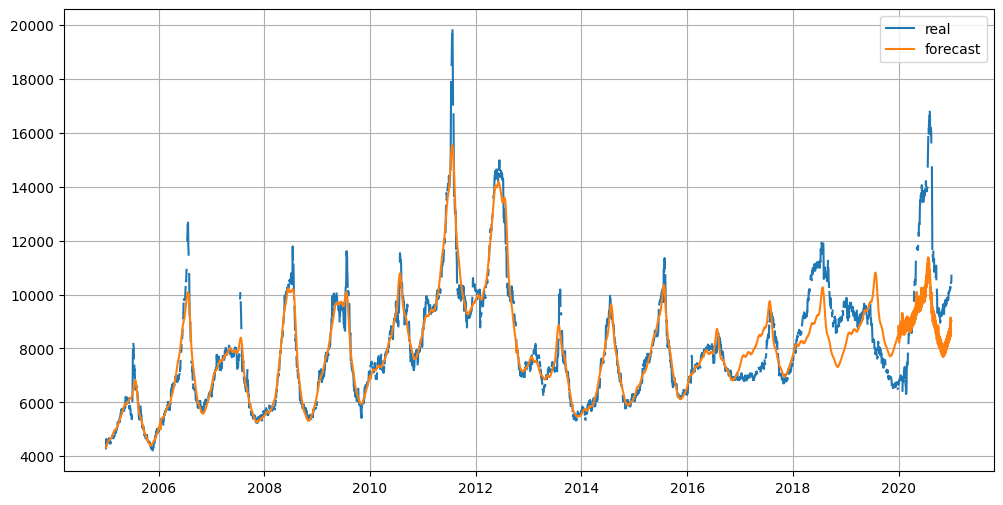

In [43]:
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
# plt.title("cp : 0.05, hp : 0.9")
plt.show()

In [87]:
con = pd.concat([df, forecast], axis=1)
con = con.dropna(axis=0)
df1 = con[df.columns]
forecast1 = con[forecast.columns]

In [88]:
y_true= df1['y'].values
y_pred = forecast1['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 2243.420


In [89]:
evaluation_model = cross_validation(final_model, initial='720 days', period='180 days', horizon = '30 days')
evaluation_metrix = performance_metrics(evaluation_model)
evaluation_metrix.sort_values('mae').head(5)

  0%|          | 0/27 [00:00<?, ?it/s]

13:29:17 - cmdstanpy - INFO - Chain [1] start processing
13:29:21 - cmdstanpy - INFO - Chain [1] done processing
13:29:23 - cmdstanpy - INFO - Chain [1] start processing
13:29:28 - cmdstanpy - INFO - Chain [1] done processing
13:29:30 - cmdstanpy - INFO - Chain [1] start processing
13:29:36 - cmdstanpy - INFO - Chain [1] done processing
13:29:38 - cmdstanpy - INFO - Chain [1] start processing
13:29:45 - cmdstanpy - INFO - Chain [1] done processing
13:29:47 - cmdstanpy - INFO - Chain [1] start processing
13:29:55 - cmdstanpy - INFO - Chain [1] done processing
13:29:57 - cmdstanpy - INFO - Chain [1] start processing
13:30:06 - cmdstanpy - INFO - Chain [1] done processing
13:30:08 - cmdstanpy - INFO - Chain [1] start processing
13:30:19 - cmdstanpy - INFO - Chain [1] done processing
13:30:20 - cmdstanpy - INFO - Chain [1] start processing
13:30:32 - cmdstanpy - INFO - Chain [1] done processing
13:30:34 - cmdstanpy - INFO - Chain [1] start processing
13:30:46 - cmdstanpy - INFO - Chain [1]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
3,6 days,0.018936,0.137609,0.116159,0.012742,0.012370,0.012725,0.311111
4,7 days,0.019555,0.139841,0.116335,0.012768,0.012370,0.012744,0.303743
0,3 days,0.020506,0.143200,0.119863,0.013199,0.013268,0.013171,0.391388
2,5 days,0.019892,0.141040,0.121446,0.013361,0.012557,0.013346,0.303349
1,4 days,0.021356,0.146138,0.124325,0.013688,0.013268,0.013672,0.354067
